In [38]:
#Import modules
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [2]:
#Read data
crimepath="data/chicago_crime_2019_2023.csv"
crime=pd.read_csv(crimepath)
uniques=crime["unique_key"].unique()
print(len(uniques))

1120322


In [3]:
#Convert date to a DateTime format
crime["date"]=pd.to_datetime(crime["date"])
crime["date"].head()

0   2021-08-27 10:00:00+00:00
1   2022-08-08 11:42:00+00:00
2   2021-10-04 08:10:00+00:00
3   2023-03-05 05:15:00+00:00
4   2019-09-16 11:53:00+00:00
Name: date, dtype: datetime64[ns, UTC]

In [4]:
#Change DateTime to year and month only
crime["month"]=crime["date"].dt.to_period('M')
len(crime["month"])

/var/folders/lb/k_lx84l52sd07wnb75py29rw0000gn/T/ipykernel_10543/744317998.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  crime["month"]=crime["date"].dt.to_period('M')


1120322

In [5]:
#Sort all crime by month
crime2=crime.sort_values(by="month")

In [16]:
sorted=crime2.groupby(["month","primary_type"])
sortcount=sorted.agg(count=("primary_type","count")).unstack(fill_value=0)
sortcount2=sortcount.drop("2023-10",axis=0)
sortcount2

count                                                             \
primary_type ARSON ASSAULT BATTERY BURGLARY CONCEALED CARRY LICENSE VIOLATION   
month                                                                           
2019-01         22    1459    3525      797                                12   
2019-02         29    1420    3344      671                                12   
2019-03         28    1667    4060      677                                14   
2019-04         31    1734    3977      700                                20   
2019-05         25    2045    4759      815                                23   
2019-06         29    2003    4748      789                                17   
2019-07         46    1931    4873      928                                21   
2019-08         36    1833    4556      904                                22   
2019-09         29    1791    4321      875                                34   
2019-10         28    1726    3863      863                                15   
2019-11         32    1474    3672      792                                11   
2019-12         41    1537    3819      827                                16   
2020-01         23    1519    3608      740                                15   
2020-02         31    1386    3387      619                                13   
2020-03         27    1477    3561      568                                11   
2020-04         36    1112    2693      528                                 7   
2020-05         78    1487    3505     1323                                12   
2020-06         74    1725    3922      754                                13   
2020-07         63    1891    4153      738                                14   
2020-08         57    1835    4078     1062                                11   
2020-09         56    1698    3443      615                                17   
2020-10         54    1512    3416      643                                14   
2020-11         49    1336    3019      619                                13   
2020-12         40    1275    2729      549                                 8   
2021-01         39    1339    2776      486                                11   
2021-02         23    1284    2439      351                                15   
2021-03         49    1451    3102      394                                14   
2021-04         41    1601    3078      416                                15   
2021-05         49    1800    3679      472                                12   
2021-06         49    1905    3845      509                                18   
2021-07         51    1956    3886      556                                16   
2021-08         48    1872    3803      600                                16   
2021-09         46    2039    3829      667                                21   
2021-10         44    1872    3756      757                                20   
2021-11         43    1629    3100      733                                12   
2021-12         47    1595    3170      718                                 3   
2022-01         26    1323    2845      579                                12   
2022-02         26    1392    2756      509                                14   
2022-03         23    1626    3355      578                                18   
2022-04         33    1559    3369      560                                14   
2022-05         44    1979    3930      605                                19   
2022-06         37    2012    3847      674                                16   
2022-07         39    1964    3754      700                                16   
2022-08         40    1984    3744      674                                15   
2022-09         49    1893    3726      653                                13   
2022-10         41    1840    3503      689                                10   
2022-11         29    1659    3083      678 

In [53]:
mvt=pd.DataFrame(sortcount2["count"][["MOTOR VEHICLE THEFT"]])
mvt
#Isolate 2019 and convert to month. Use a simple date, isolate each year into their months, convert them to integers 1-12, regress

primary_type,MOTOR VEHICLE THEFT
month,
2019-01,707
2019-02,654
2019-03,717
2019-04,770
2019-05,764
2019-06,773
2019-07,885
2019-08,843
2019-09,679


In [40]:
mvt2019=mvt.loc["2019-01":"2019-12"]
mvt2019["list"]=(np.arange(len(mvt2019)))+1
mvt2019

/var/folders/lb/k_lx84l52sd07wnb75py29rw0000gn/T/ipykernel_10543/3206769043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvt2019["list"]=(np.arange(len(mvt2019)))+1


primary_type,MOTOR VEHICLE THEFT,list
month,,
2019-01,707,1
2019-02,654,2
2019-03,717,3
2019-04,770,4
2019-05,764,5
2019-06,773,6
2019-07,885,7
2019-08,843,8
2019-09,679,9


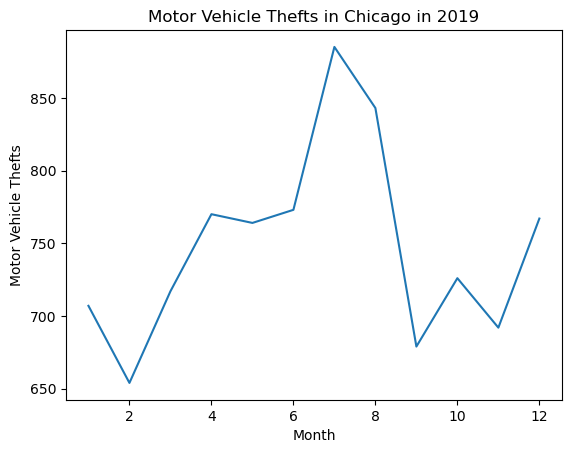

In [44]:
plt.plot(mvt2019["list"],mvt2019["MOTOR VEHICLE THEFT"])
plt.xlabel("Month")
plt.ylabel("Motor Vehicle Thefts")
plt.title("Motor Vehicle Thefts in Chicago in 2019")
plt.show()

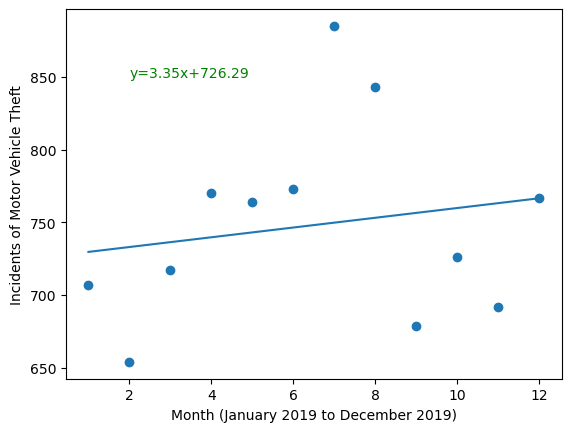

In [86]:
(m, b, rvalue, pvalue, stdder)=st.linregress(mvt2019["list"],mvt2019["MOTOR VEHICLE THEFT"])
regression=b+m*(mvt2019["list"])
line="y="+str(round(m,2))+"x+"+str(round(b,2))
plt.scatter(mvt2019["list"], mvt2019["MOTOR VEHICLE THEFT"], marker="o")
plt.plot(mvt2019["list"], regression)
plt.annotate(f"y={round(m,2)}x+{round(b,2)}",xy=(2,850),color="green")
plt.xlabel("Month (January 2019 to December 2019)")
plt.ylabel("Incidents of Motor Vehicle Theft")
plt.show()

In [43]:
mvt2020=mvt.loc["2020-01":"2020-12"]
mvt2020["list2020"]=(np.arange(len(mvt2020)))+1
mvt2020

/var/folders/lb/k_lx84l52sd07wnb75py29rw0000gn/T/ipykernel_10543/2712161072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvt2020["list2020"]=(np.arange(len(mvt2020)))+1


primary_type,MOTOR VEHICLE THEFT,list2020
month,,
2020-01,669,1
2020-02,653,2
2020-03,628,3
2020-04,659,4
2020-05,829,5
2020-06,794,6
2020-07,959,7
2020-08,996,8
2020-09,921,9


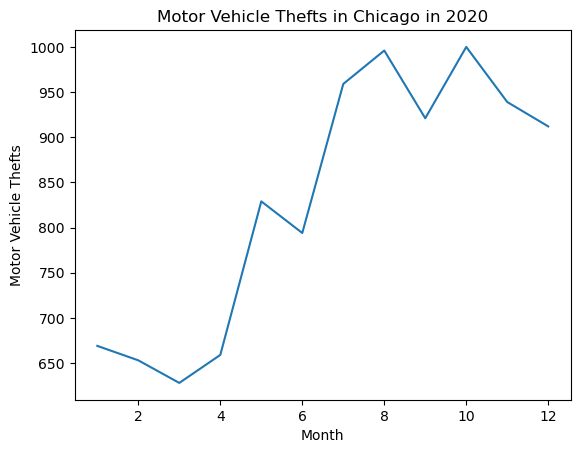

In [45]:
plt.plot(mvt2020["list2020"],mvt2020["MOTOR VEHICLE THEFT"])
plt.xlabel("Month")
plt.ylabel("Motor Vehicle Thefts")
plt.title("Motor Vehicle Thefts in Chicago in 2020")
plt.show()

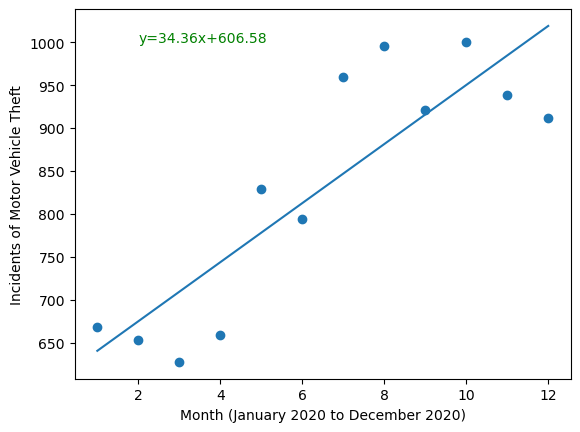

In [88]:
(m, b, rvalue, pvalue, stdder)=st.linregress(mvt2020["list2020"],mvt2020["MOTOR VEHICLE THEFT"])
regression2=b+m*(mvt2020["list2020"])
line="y="+str(round(m,2))+"x+"+str(round(b,2))
plt.scatter(mvt2020["list2020"], mvt2020["MOTOR VEHICLE THEFT"], marker="o")
plt.plot(mvt2020["list2020"], regression2)
plt.annotate(f"y={round(m,2)}x+{round(b,2)}",xy=(2,1000),color="green")
plt.xlabel("Month (January 2020 to December 2020)")
plt.ylabel("Incidents of Motor Vehicle Theft")
plt.show()

In [46]:
mvt2021=mvt.loc["2021-01":"2021-12"]
mvt2021["list2021"]=(np.arange(len(mvt2021)))+1
mvt2021

/var/folders/lb/k_lx84l52sd07wnb75py29rw0000gn/T/ipykernel_10543/3521613910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvt2021["list2021"]=(np.arange(len(mvt2021)))+1


primary_type,MOTOR VEHICLE THEFT,list2021
month,,
2021-01,802,1
2021-02,630,2
2021-03,788,3
2021-04,713,4
2021-05,747,5
2021-06,834,6
2021-07,838,7
2021-08,910,8
2021-09,1016,9


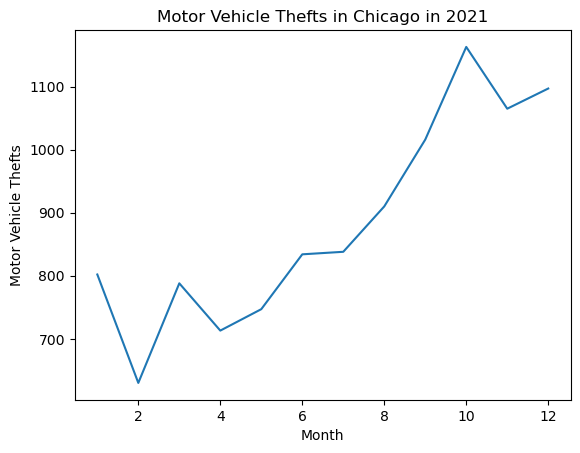

In [47]:
plt.plot(mvt2021["list2021"],mvt2021["MOTOR VEHICLE THEFT"])
plt.xlabel("Month")
plt.ylabel("Motor Vehicle Thefts")
plt.title("Motor Vehicle Thefts in Chicago in 2021")
plt.show()

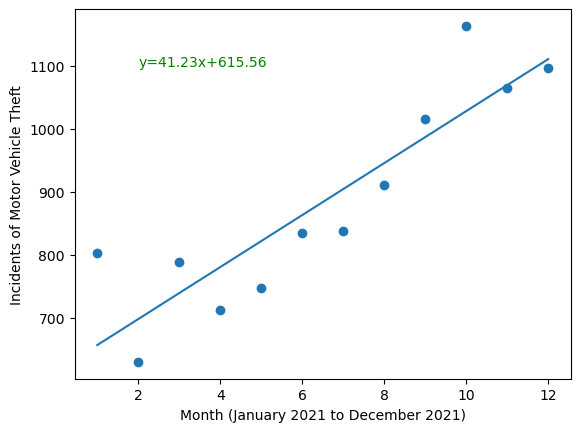

In [89]:
(m, b, rvalue, pvalue, stdder)=st.linregress(mvt2021["list2021"],mvt2021["MOTOR VEHICLE THEFT"])
regression3=b+m*(mvt2021["list2021"])
line="y="+str(round(m,2))+"x+"+str(round(b,2))
plt.scatter(mvt2021["list2021"], mvt2021["MOTOR VEHICLE THEFT"], marker="o")
plt.plot(mvt2021["list2021"], regression3)
plt.annotate(f"y={round(m,2)}x+{round(b,2)}",xy=(2,1100),color="green")
plt.xlabel("Month (January 2021 to December 2021)")
plt.ylabel("Incidents of Motor Vehicle Theft")
plt.show()

In [48]:
mvt2022=mvt.loc["2022-01":"2022-12"]
mvt2022["list2022"]=(np.arange(len(mvt2022)))+1
mvt2022

/var/folders/lb/k_lx84l52sd07wnb75py29rw0000gn/T/ipykernel_10543/1899170270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvt2022["list2022"]=(np.arange(len(mvt2022)))+1


primary_type,MOTOR VEHICLE THEFT,list2022
month,,
2022-01,1107,1
2022-02,963,2
2022-03,1073,3
2022-04,1001,4
2022-05,1030,5
2022-06,1138,6
2022-07,1761,7
2022-08,2112,8
2022-09,2410,9


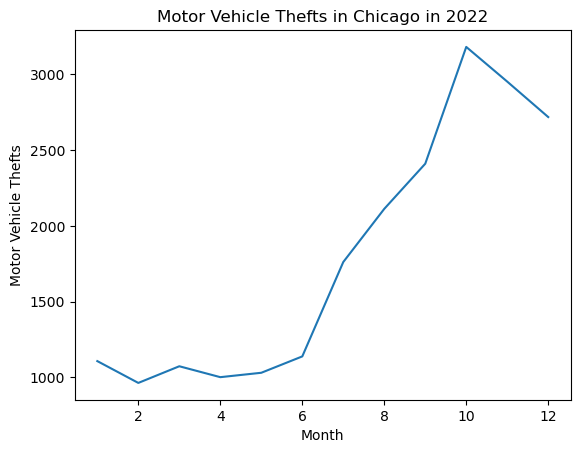

In [49]:
plt.plot(mvt2022["list2022"],mvt2022["MOTOR VEHICLE THEFT"])
plt.xlabel("Month")
plt.ylabel("Motor Vehicle Thefts")
plt.title("Motor Vehicle Thefts in Chicago in 2022")
plt.show()

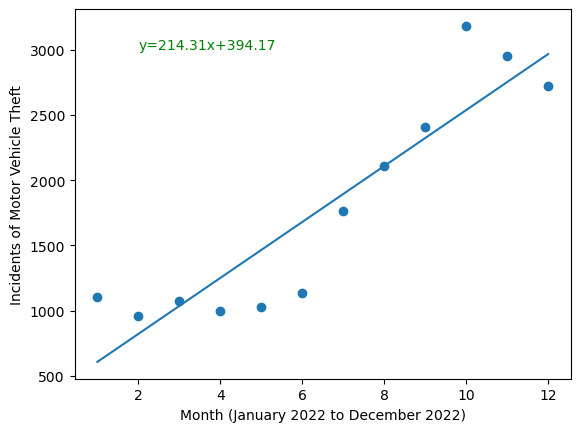

In [90]:
(m, b, rvalue, pvalue, stdder)=st.linregress(mvt2022["list2022"],mvt2022["MOTOR VEHICLE THEFT"])
regression4=b+m*(mvt2022["list2022"])
line="y="+str(round(m,2))+"x+"+str(round(b,2))
plt.scatter(mvt2022["list2022"], mvt2022["MOTOR VEHICLE THEFT"], marker="o")
plt.plot(mvt2022["list2022"], regression4)
plt.annotate(f"y={round(m,2)}x+{round(b,2)}",xy=(2,3000),color="green")
plt.xlabel("Month (January 2022 to December 2022)")
plt.ylabel("Incidents of Motor Vehicle Theft")
plt.show()

In [92]:
mvttotal=mvt.loc["2019-01":"2022-12"]
mvttotal["monthlist"]=(np.arange(len(mvttotal)))+1
mvttotal

/var/folders/lb/k_lx84l52sd07wnb75py29rw0000gn/T/ipykernel_10543/2222843331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvttotal["monthlist"]=(np.arange(len(mvttotal)))+1


primary_type,MOTOR VEHICLE THEFT,monthlist
month,,
2019-01,707,1
2019-02,654,2
2019-03,717,3
2019-04,770,4
2019-05,764,5
2019-06,773,6
2019-07,885,7
2019-08,843,8
2019-09,679,9


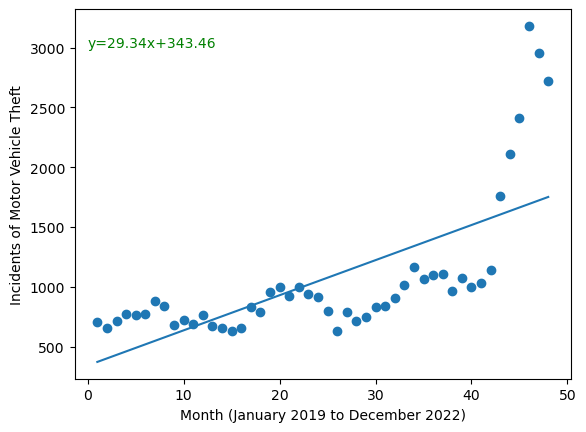

In [94]:
(m, b, rvalue, pvalue, stdder)=st.linregress(mvttotal["monthlist"],mvttotal["MOTOR VEHICLE THEFT"])
regression=b+m*(mvttotal["monthlist"])
line="y="+str(round(m,2))+"x+"+str(round(b,2))
plt.scatter(mvttotal["monthlist"], mvttotal["MOTOR VEHICLE THEFT"], marker="o")
plt.plot(mvttotal["monthlist"], regression)
plt.annotate(f"y={round(m,2)}x+{round(b,2)}",xy=(0,3000),color="green")
plt.xlabel("Month (January 2019 to December 2022)")
plt.ylabel("Incidents of Motor Vehicle Theft")
plt.show()